In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
path = os.getcwd()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn

import gensim
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
 


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
#%pip install pyldavis

# Latent Dirichlet Allocation

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/update_version_7.csv', low_memory=True)
df['statement']=df['statement'].astype(str)
df = df.astype({'Date':'datetime64', 'chair_in_charge':str, 'lemmatized':str})
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156082 entries, 0 to 156081
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              156082 non-null  int64         
 1   Date               156082 non-null  datetime64[ns]
 2   interlocutor_name  156080 non-null  object        
 3   statement _size    156082 non-null  int64         
 4   statement          156082 non-null  object        
 5   statement_number   156082 non-null  object        
 6   chair_in_charge    156082 non-null  object        
 7   score_academ       156082 non-null  float64       
 8   score_hostile      156082 non-null  float64       
 9   score_econo        156082 non-null  float64       
 10  score_virtue       156082 non-null  float64       
 11  score_vice         156082 non-null  float64       
 12  score_hawkish      156082 non-null  float64       
 13  score_posi         156082 non-null  float64 

Fonctions de visualisation de la LDA:

In [7]:
def LDA_fit(series, n_topic): #notre LDA prend en entrée le series.dataframe contenant l'information textuelle 
                                      #et le nombre de topic à modéliser
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(series)

    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                                  learning_method='online',
                                  learning_offset=50.,
                                  random_state=0)
    lda.fit(tfidf)
    LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=n_topic, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

    tf_feature_names = tfidf_vectorizer.get_feature_names()

    return pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)

def LDA_on_dataset(series, n_topic): #notre LDA prend en entrée le series.dataframe contenant l'information textuelle 
                                      #et le nombre de topic à modéliser
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(series)

    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                                  learning_method='online',
                                  learning_offset=50.,
                                  random_state=0)
    lda.fit_transform(tfidf)
    LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=n_topic, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

    tf_feature_names = tfidf_vectorizer.get_feature_names()

    return pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)



## Choix des documents

### Agrégation par statement
Chaque *statement* est un document : 

In [8]:
df1 = df[df.Date.dt.year!=2015]
df1.head()

,index,Date,interlocutor_name,statement _size,statement,statement_number,chair_in_charge,score_academ,score_hostile,score_econo,score_virtue,score_vice,score_hawkish,score_posi,score_affi,score_uncert,lemmatized
0,0,1976-08-17,BURNS,41,ready start meeting morning first item busines...,statement_0,CHAIRMAN BURNS,0.0,0.04878,0.024390,0.048780,0.0,0.0,-1.0,1.0,-0.000000,ready start meeting morning item business act...
1,1,1976-08-17,HOLMES,2,statementsee appendix,statement_1,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000000,statementsee appendix
2,2,1976-08-17,BLACK,27,alan think realignment currencies european com...,statement_2,CHAIRMAN BURNS,0.0,0.00000,0.037037,0.037037,0.0,0.0,1.0,1.0,-0.000000,alan think realignment currency european comm...
3,3,1976-08-17,HOLMES,49,two alternatives one everybody goes floats sep...,statement_3,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,-1.0,-0.020408,alternative everybody go float separately sec...
4,4,1976-08-17,BLACK,8,think would likely,statement_4,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000000,think likely


In [9]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df1.lemmatized, 20)

Statement : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.226276 -0.079700       1        1  36.119196
2      0.251221 -0.011689       2        1  20.139471
7      0.210962  0.052654       3        1   5.302915
10     0.192237  0.046250       4        1   4.382500
16     0.076277 -0.170023       5        1   2.985572
18    -0.224203  0.208505       6        1   2.795773
0      0.070990 -0.115930       7        1   2.458163
14     0.100733  0.124392       8        1   2.325365
11    -0.003695  0.170019       9        1   2.241811
5      0.057320  0.205171      10        1   2.236838
17     0.028742  0.175702      11        1   2.124930
6     -0.082026 -0.020777      12        1   2.073598
12    -0.228108  0.045119      13        1   1.995003
9     -0.000354 -0.090909      14        1   1.970641
1     -0.009034 -0.125595      15        1   1.962252
19    -0.188841 -0.076173      16        1   1.933270
13    -0.054131 -0.113614      17        1   1.768895
3     -0.128371 -0.054119      18        1   1.757954
4     -0.235129 -0.056472      19        1   1.741359
8     -0.060867 -0.112810      20        1   1.684492, topic_info=          Term         Freq        Total Category  logprob  loglift
659  president  7365.000000  7365.000000  Default  30.0000  30.0000
901      thank  6207.000000  6207.000000  Default  29.0000  29.0000
361   governor  5567.000000  5567.000000  Default  28.0000  28.0000
759      right  3539.000000  3539.000000  Default  27.0000  27.0000
902      thats  3411.000000  3411.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
690     public   109.965083   425.848034  Topic20  -4.0445   2.7298
427  indicated    38.109250   190.769803  Topic20  -5.1042   2.4731
899       term   164.584830  1106.726163  Topic20  -3.6413   2.1780
642      point   176.307584  2268.740653  Topic20  -3.5725   1.5290
906      think   100.732410  5011.898932  Topic20  -4.1322   0.1766

[895 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         1  0.317796    able
1         2  0.308068    able
1         3  0.103770    able
1        15  0.265911    able
2         1  0.911874  abroad
...     ...       ...     ...
998       2  0.183746   youve
998       7  0.632088   youve
999       1  0.360787    zero
999       2  0.339202    zero
999      14  0.296031    zero

[2129 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 3, 8, 11, 17, 19, 1, 15, 12, 6, 18, 7, 13, 10, 2, 20, 14, 4, 5, 9])

In [12]:
series = df1.lemmatized
n_topic=20
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(series)

lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                              learning_method='online',
                              learning_offset=50.,
                              random_state=0)
lda.fit(tfidf)


KeyboardInterrupt: ignored


 Nombre de topics 20 
 Nombre de mots par topic 1000


Text(33.0, 0.5, 'Mots')

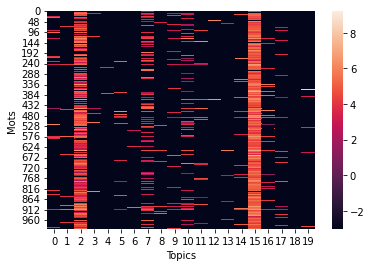

In [11]:
import seaborn as sns
print("\n Nombre de topics",np.shape(lda.components_)[0], "\n Nombre de mots par topic",np.shape(lda.components_)[1])
sns.heatmap(np.log(lda.components_.T))
plt.xlabel("Topics")
plt.ylabel("Mots")

In [13]:
lda.perplexity(tfidf)

1718.0337239782025

#### Avec Gemsim 

In [14]:
from gensim import corpora, models
from nltk import word_tokenize


/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


In [ ]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df1.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


In [16]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.275*"president" + 0.119*"governor" + 0.114*"thank" + 0.111*"yes" + 0.042*"chairman" + 0.035*"vice" + 0.016*"plosser" + 0.015*"kocherlakota" + 0.014*"lockhart" + 0.014*"yellen"


Topic: 1 
Words: 0.041*"policy" + 0.023*"inflation" + 0.015*"monetary" + 0.013*"alternative" + 0.009*"time" + 0.008*"point" + 0.008*"target" + 0.007*"chairman" + 0.007*"need" + 0.007*"year"


Topic: 2 
Words: 0.027*"point" + 0.019*"thats" + 0.019*"way" + 0.017*"want" + 0.016*"little" + 0.016*"going" + 0.015*"percent" + 0.015*"range" + 0.013*"thing" + 0.011*"look"


Topic: 3 
Words: 0.044*"threshold" + 0.024*"yield" + 0.021*"rate" + 0.019*"market" + 0.019*"chart" + 0.017*"curve" + 0.015*"moved" + 0.014*"level" + 0.013*"question" + 0.012*"second"


Topic: 4 
Words: 0.051*"going" + 0.018*"market" + 0.016*"okay" + 0.015*"know" + 0.014*"way" + 0.013*"time" + 0.012*"language" + 0.012*"thing" + 0.012*"need" + 0.011*"want"


Topic: 5 
Words: 0.041*"committee" + 0.032*"reserve" + 0.018*"federal" + 0.0

In [77]:
def model_to_chart(name_model):
  token=[]

  for idx, topic in ldamodel.print_topics(-1):
    token.append(topic.split('"'))
  weight=[]
  word_list = []
  for elem in token:
    #print(elem)
  # print(elem[1::2])
    weight.append(elem[::2])
    word_list.append(elem[1::2])
  weight2 = [[float(num.replace('*','').replace('+','').replace(' ','')) for num in elem[:len(elem)-1]] for elem in weight]
  plt.figure(figsize=(12,10))
  sns.heatmap(weight2, cmap='Blues', annot=word_list, fmt='')
  plt.ylabel('Topics')
  plt.xlabel('Top 10 words')

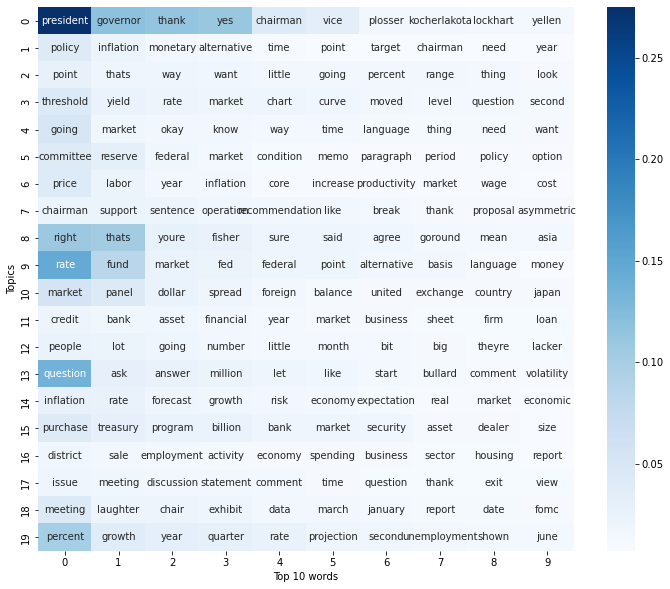

In [78]:
model_to_chart(ldamodel)

In [80]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
texts = df1.lemmatized.tolist()
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin ins


Perplexity:  -7.386892046168703


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

NameError: ignored

### Agrégation par meeting

On agrège les statements par meeting (donc par date)

In [81]:
df2 = df.groupby('Date').apply(lambda s: ' '.join(s['lemmatized']))
df2.head()

Date
1976-08-17     ready start meeting morning item business act...
1976-09-21     meeting way good approval minute august meeti...
1976-10-19     let outset oconnell brief report unintelligib...
1976-11-16     item thought best executive session discus li...
1976-12-21     discussing legislative administrative detail ...
dtype: object

In [82]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df2, 20)

Statement : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.026328 -0.000007       1        1  94.467750
7     -0.004426  0.000828       2        1   0.291171
11    -0.003644 -0.000608       3        1   0.291171
9     -0.002147  0.000106       4        1   0.291171
8     -0.001475 -0.000908       5        1   0.291171
19    -0.001673  0.000243       6        1   0.291171
5     -0.000051 -0.000145       7        1   0.291171
2      0.001166 -0.000070       8        1   0.291171
15     0.001310  0.000022       9        1   0.291171
14     0.002461  0.000252      10        1   0.291171
16     0.003100  0.000653      11        1   0.291171
13     0.002272 -0.000415      12        1   0.291171
1      0.003070 -0.000392      13        1   0.291171
3      0.003077  0.000505      14        1   0.291171
6      0.003035  0.000525      15        1   0.291171
4      0.003314  0.000352      16        1   0.291171
17     0.004192 -0.000368      17        1   0.291171
0      0.003935  0.000083      18        1   0.291171
18     0.004160 -0.000102      19        1   0.291171
10     0.004654 -0.000553      20        1   0.291171, topic_info=          Term       Freq      Total Category  logprob  loglift
972       weve  27.000000  27.000000  Default  30.0000  30.0000
375  greenbook  24.000000  24.000000  Default  29.0000  29.0000
905      there  21.000000  21.000000  Default  28.0000  28.0000
363        gdp  22.000000  22.000000  Default  27.0000  27.0000
404         id  19.000000  19.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
812     slight   0.018037   4.294085  Topic20  -6.7392   0.3664
114    bullard   0.018107   4.603831  Topic20  -6.7353   0.3007
816    slowing   0.018445   8.649483  Topic20  -6.7168  -0.3115
91     benefit   0.018099   7.151779  Topic20  -6.7357  -0.1402
676    project   0.017988   5.027011  Topic20  -6.7419   0.2061

[1458 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.998970      10
1         1  0.668342      12
2         1  0.676023      15
3         1  0.678229      20
4         1  0.599494    2014
...     ...       ...     ...
991       1  0.977068  yellen
992       1  0.978393     yen
997       1  1.013064   youre
998       1  0.857088   youve
999       1  0.995694    zero

[550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 8, 12, 10, 9, 20, 6, 3, 16, 15, 17, 14, 2, 4, 7, 5, 18, 1, 19, 11])

In [83]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df2)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [84]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.086*"liftoff" + 0.078*"rrp" + 0.027*"tealbook" + 0.027*"ioer" + 0.019*"normalization" + 0.010*"sep" + 0.008*"kocherlakota" + 0.008*"williams" + 0.008*"quarterend" + 0.006*"simon"


Topic: 1 
Words: 0.020*"liftoff" + 0.018*"court" + 0.016*"rrp" + 0.011*"tealbook" + 0.009*"coldwell" + 0.007*"mayo" + 0.007*"normalization" + 0.005*"williams" + 0.005*"sep" + 0.005*"eastburn"


Topic: 2 
Words: 0.067*"liftoff" + 0.034*"tealbook" + 0.026*"normalization" + 0.022*"reinvestments" + 0.020*"sep" + 0.019*"reinvestment" + 0.018*"rrp" + 0.014*"williams" + 0.009*"thomas" + 0.009*"kocherlakota"


Topic: 3 
Words: 0.022*"liftoff" + 0.014*"tealbook" + 0.010*"rrp" + 0.010*"reinvestments" + 0.009*"normalization" + 0.008*"reinvestment" + 0.008*"cone" + 0.007*"sep" + 0.007*"ioer" + 0.006*"kocherlakota"


Topic: 4 
Words: 0.031*"tealbook" + 0.019*"sep" + 0.013*"liftoff" + 0.010*"voter" + 0.008*"bullard" + 0.007*"efficacy" + 0.006*"kocherlakota" + 0.006*"fan" + 0.006*"tapering" + 0.006*"lsap

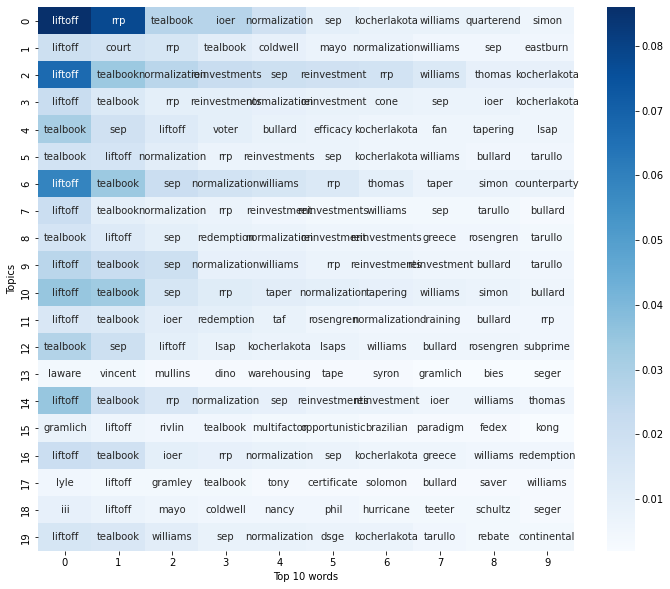

In [85]:
model_to_chart(ldamodel)

In [ ]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.643503281055234

Coherence Score:  0.7136292970376518


Ce niveau d'agrégation est moins pertinent. 

### Agrégation avec interlocuteur et date

In [86]:
df3 = df.groupby(['interlocutor_name', 'Date']).apply(lambda s: ' '.join(s['lemmatized']))


In [88]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df3, 20)

Statement : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.011256  0.016796       1        1  83.938381
2     -0.020468  0.118571       2        1   7.247723
14    -0.416377 -0.007301       3        1   1.507737
7      0.016342 -0.267801       4        1   0.487439
5      0.024479  0.008611       5        1   0.426170
9      0.025498  0.008705       6        1   0.426170
1      0.025661  0.008746       7        1   0.426170
0      0.025255  0.008702       8        1   0.426170
12     0.025739  0.008751       9        1   0.426170
17     0.025739  0.008749      10        1   0.426170
15     0.025635  0.008744      11        1   0.426170
13     0.025740  0.008752      12        1   0.426170
10     0.025695  0.008746      13        1   0.426170
11     0.025742  0.008753      14        1   0.426170
6      0.025677  0.008749      15        1   0.426170
4      0.025629  0.008740      16        1   0.426170
19     0.025649  0.008747      17        1   0.426170
8      0.025758  0.008753      18        1   0.426170
3      0.025627  0.008736      19        1   0.426170
18     0.025725  0.008752      20        1   0.426170, topic_info=          Term        Freq       Total Category  logprob  loglift
993        yes  395.000000  395.000000  Default  30.0000  30.0000
120   chairman  356.000000  356.000000  Default  29.0000  29.0000
43    appendix  218.000000  218.000000  Default  28.0000  28.0000
905      thank  262.000000  262.000000  Default  27.0000  27.0000
655  president  292.000000  292.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
231     doesnt    0.377857  105.388557  Topic20  -6.9059  -0.1728
232     dollar    0.377857  196.161299  Topic20  -6.9059  -0.7941
809      shown    0.377827  103.133975  Topic20  -6.9060  -0.1513
479       left    0.377823   68.637636  Topic20  -6.9060   0.2559
453        ive    0.377803   97.761154  Topic20  -6.9061  -0.0978

[1209 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.449124      10
1         2  0.428372    2015
2         2  0.532728    2016
3         2  0.446811    2017
6         1  0.879016  abroad
...     ...       ...     ...
995       1  0.535833   yield
995       2  0.390711   yield
996       1  0.899262    york
997       1  0.920285   youre
997       2  0.011088   youre

[623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 3, 15, 8, 6, 10, 2, 1, 13, 18, 16, 14, 11, 12, 7, 5, 20, 9, 4, 19])

In [ ]:
df3 = df1.groupby(['interlocutor_name', 'Date']).apply(lambda s: ' '.join(s['lemmatized']))
texts = []
for elem in df3:
    texts.append(word_tokenize(elem))

In [90]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df3)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [91]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.006*"chair" + 0.005*"madam" + 0.005*"august" + 0.005*"contact" + 0.004*"sheet" + 0.004*"region" + 0.004*"index" + 0.004*"liftoff" + 0.003*"core" + 0.003*"england"


Topic: 1 
Words: 0.008*"borrowing" + 0.006*"million" + 0.005*"gnp" + 0.004*"unintelligible" + 0.004*"velocity" + 0.003*"nominal" + 0.003*"exchange" + 0.003*"discount" + 0.003*"tax" + 0.003*"deficit"


Topic: 2 
Words: 0.005*"march" + 0.004*"liftoff" + 0.004*"chair" + 0.004*"tealbook" + 0.004*"madam" + 0.004*"paragraph" + 0.003*"core" + 0.003*"communication" + 0.003*"strategy" + 0.003*"contact"


Topic: 3 
Words: 0.007*"chair" + 0.005*"liftoff" + 0.005*"vice" + 0.005*"madam" + 0.005*"okay" + 0.004*"rule" + 0.004*"thomas" + 0.003*"open" + 0.003*"williams" + 0.003*"division"


Topic: 4 
Words: 0.006*"facility" + 0.005*"rrp" + 0.005*"option" + 0.004*"security" + 0.004*"april" + 0.004*"overnight" + 0.003*"august" + 0.003*"sheet" + 0.003*"spread" + 0.003*"loan"


Topic: 5 
Words: 0.006*"mortgage" + 0.005*"loan"

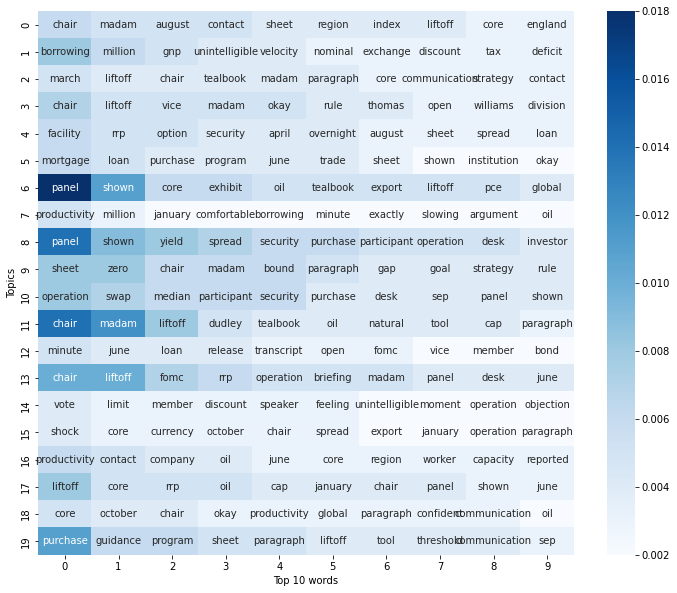

In [92]:
model_to_chart(ldamodel)

In [ ]:

# Compute Perplexity
print('\nPerplexity: ', model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.877426043506718

Coherence Score:  0.4376010032796597


### Agrégation par interlocuteur

In [93]:
df4 = df.groupby(['interlocutor_name']).apply(lambda s: ' '.join(s['lemmatized']))

In [ ]:
df4.head()

interlocutor_name
AARONSON      referring exhibit follow green nonfinancial c...
AHMED         referring exhibit follow blue international o...
ALEXANDER     main change forecast international driven eve...
ALTMA         vice chairman volcker yes president baughman ...
ALTMANN       chairman  chairman  chairman  chairman  chair...
dtype: object

In [ ]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_fit(df4, 20)

Statement : 



/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.056590 -0.000002       1        1  92.216231
2     -0.000889  0.000342       2        1   0.429706
11    -0.003237 -0.003049       3        1   0.425881
15     0.002035  0.000177       4        1   0.407540
19     0.000339  0.000092       5        1   0.407540
7     -0.001237  0.000044       6        1   0.407540
1     -0.000331 -0.000041       7        1   0.407540
9     -0.001252  0.000089       8        1   0.407540
18    -0.002394  0.000414       9        1   0.407540
17    -0.004033  0.000449      10        1   0.407540
5     -0.003550  0.000164      11        1   0.407540
0     -0.004529  0.000207      12        1   0.407540
8     -0.003338 -0.000036      13        1   0.407540
14    -0.004310  0.000181      14        1   0.407540
6     -0.003536  0.000163      15        1   0.407540
12    -0.005096  0.000107      16        1   0.407540
4     -0.004532  0.000338      17        1   0.407540
3     -0.005530  0.000231      18        1   0.407540
10    -0.005211  0.000007      19        1   0.407540
13    -0.005960  0.000121      20        1   0.407540, topic_info=          Term       Freq      Total Category  logprob  loglift
700       rate  57.000000  57.000000  Default  30.0000  30.0000
910      think  44.000000  44.000000  Default  29.0000  29.0000
435  inflation  34.000000  34.000000  Default  28.0000  28.0000
624    percent  32.000000  32.000000  Default  27.0000  27.0000
992       year  30.000000  30.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
906      thats   0.022034  16.035590  Topic20  -6.7268  -1.0872
495  longerrun   0.021468   3.308781  Topic20  -6.7528   0.4650
376       half   0.021530   6.629767  Topic20  -6.7499  -0.2271
137     coming   0.021497   5.442199  Topic20  -6.7514  -0.0312
491     little   0.021488  11.744681  Topic20  -6.7518  -0.8009

[1415 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.556105       10
1         1  0.965312     2015
2         1  0.784150     2016
3         1  0.968145     2017
4         1  0.878257  ability
...     ...       ...      ...
993       1  0.987567      yes
996       1  0.973969     york
997       1  0.999855    youre
998       1  0.904827    youve
999       1  0.937792     zero

[567 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 3, 12, 16, 20, 8, 2, 10, 19, 18, 6, 1, 9, 15, 7, 13, 5, 4, 11, 14])

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [ ]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df4)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=20, workers=2)


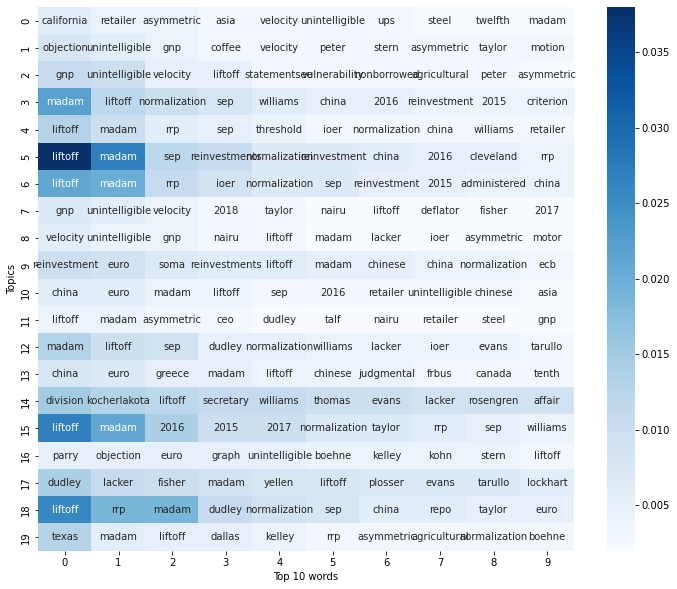

In [95]:
model_to_chart(ldamodel)

# Computing score and novelty

In [100]:
import os

path2 = path+"/novelty_transience_resonance/"
os.chdir(path)
from calculate_novelty_transience_resonance import *

ModuleNotFoundError: ignored

*novelty_transience_resonance(thetas_arr, scale)* : *thetas_arr* is the document topic mixture distribution, and *scale* the window for scaling.

In [99]:
novelty_transience_resonance(thetas_arr, scale)

NameError: ignored

In [ ]:

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df1.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
 

# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
 
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=100, workers=2)


In [ ]:
topic_distribution = list(ldamodel[corpus])
t1 = topic_distribution[1]
t1

[(45, 0.28109202), (75, 0.6797068)]

In [ ]:
thetas_arr = [[1 for i in range(100)] for j in range(len(topic_distribution))]
for i in range(len(topic_distribution)):
    for j in range(len(topic_distribution[i])):
        index_arr = topic_distribution[i][j][0]
        #print(index_arr)
        thetas_arr[i][index_arr] = topic_distribution[i][j][1]
        
thetas_arr = np.array(thetas_arr)

In [ ]:
np.shape(thetas_arr), np.mean(thetas_arr)

((3226, 100), 0.9921103184479759)

In [ ]:
ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
dfNTR = pd.DataFrame({'Novelty':ntr[0], 'Transience':ntr[1], 'Resonance':ntr[2]})

<>:10: DeprecationWarning: invalid escape sequence \m
<>:11: DeprecationWarning: invalid escape sequence \m
<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<>:10: DeprecationWarning: invalid escape sequence \m
<>:11: DeprecationWarning: invalid escape sequence \m
<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223/621226176.py:10: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223/621226176.py:11: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('Transience $\mathcal{T}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223/621226176.py:23: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223

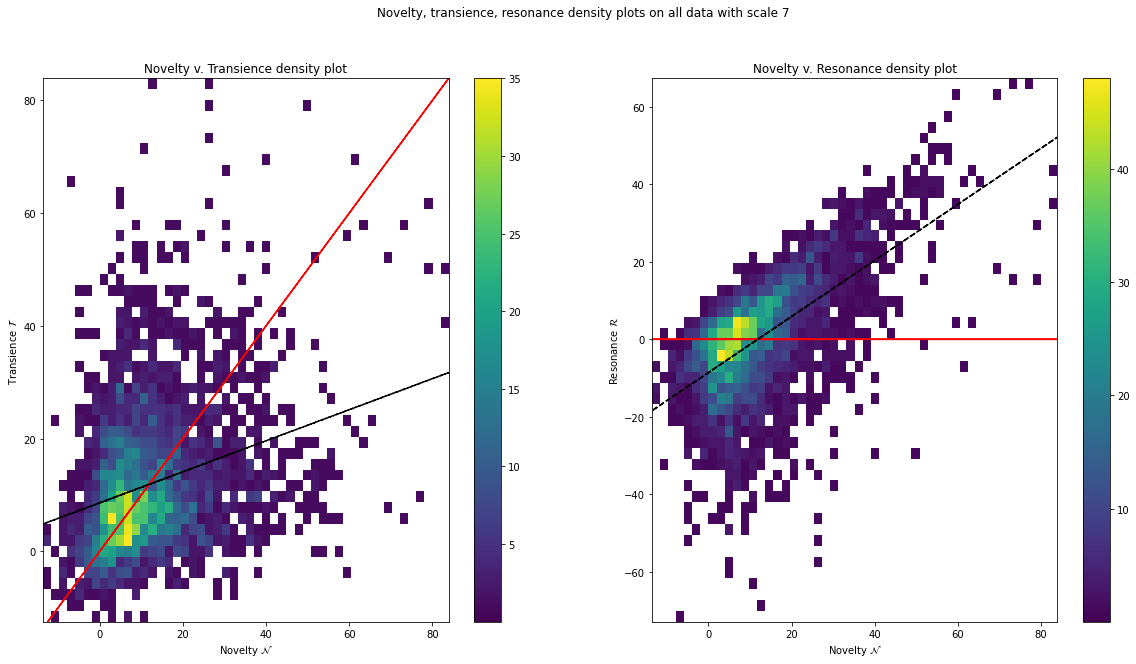

In [ ]:
scale = 7
nb_topic = 100
cmap = plt.cm.get_cmap("viridis").copy()
cmap.set_under('white')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist2d(dfNTR['Novelty'], dfNTR['Transience'], bins=(50, 50), cmap=cmap, vmin=0.0001)
plt.colorbar()
plt.plot(dfNTR['Novelty'],dfNTR['Novelty'], color='red')
plt.xlabel('Novelty $\mathcal{N}$')
plt.ylabel('Transience $\mathcal{T}$')
plt.title('Novelty v. Transience density plot')
m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Transience'], 1)
plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )


plt.subplot(122)
plt.hist2d(dfNTR['Novelty'], dfNTR['Resonance'], bins=(50, 50), cmap=cmap, vmin=0.0001)
plt.colorbar() 
plt.plot(dfNTR['Novelty'],np.zeros(len(dfNTR['Novelty'])), color='red')
m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Resonance'], 1)
plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )
plt.xlabel('Novelty $\mathcal{N}$')
plt.ylabel('Resonance $\mathcal{R}$')
plt.title('Novelty v. Resonance density plot')

plt.suptitle(f"Novelty, transience, resonance density plots on all data with scale {scale}")
plt.savefig(f'all_data_{nb_topic}_{scale}.png')

In [ ]:
interloc_list = pd.unique(df.interlocutor_name)
chair_list = pd.unique(df.chair_in_charge)

In [ ]:
def plot_ntr_select(select_topic_distribution):
    thetas_arr = [[1 for i in range(100)] for j in range(len(select_topic_distribution))]
    for i in range(len(select_topic_distribution)):
        for j in range(len(select_topic_distribution[i])):
            index_arr = select_topic_distribution[i][j][0]
            #print(index_arr)
            thetas_arr[i][index_arr] = select_topic_distribution[i][j][1]

    thetas_arr = np.array(thetas_arr)

    ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
    dfNTR = pd.DataFrame({'Novelty':ntr[0], 'Transience':ntr[1], 'Resonance':ntr[2]})

    scale = 7
    nb_topic = 100
    cmap = plt.cm.get_cmap("viridis").copy()
    cmap.set_under('white')
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.hist2d(dfNTR['Novelty'], dfNTR['Transience'], bins=(50, 50), cmap=cmap, vmin=0.0001)
    plt.colorbar()
    plt.plot(dfNTR['Novelty'],dfNTR['Novelty'], color='red')
    plt.xlabel('Novelty $\mathcal{N}$')
    plt.ylabel('Transience $\mathcal{T}$')
    plt.title('Novelty v. Transience density plot')
    m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Transience'], 1)
    plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )


    plt.subplot(122)
    plt.hist2d(dfNTR['Novelty'], dfNTR['Resonance'], bins=(50, 50), cmap=cmap, vmin=0.0001)
    plt.colorbar() 
    plt.plot(dfNTR['Novelty'],np.zeros(len(dfNTR['Novelty'])), color='red')
    m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Resonance'], 1)
    plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )
    plt.xlabel('Novelty $\mathcal{N}$')
    plt.ylabel('Resonance $\mathcal{R}$')
    plt.title('Novelty v. Resonance density plot')

    #plt.suptitle(f"Novelty, transience, resonance density plots on all data with scale {scale}")
    #plt.savefig(f'all_data_{nb_topic}_{scale}.png')
    return thetas_arr

<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<>:36: DeprecationWarning: invalid escape sequence \m
<>:37: DeprecationWarning: invalid escape sequence \m
<>:23: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<>:36: DeprecationWarning: invalid escape sequence \m
<>:37: DeprecationWarning: invalid escape sequence \m
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223/2248672830.py:23: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223/2248672830.py:24: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('Transience $\mathcal{T}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60223/2248672830.py:36: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Novelty $\mathcal{N}$')
/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/ipykernel_60

### PAR CHAIR

In [ ]:
df_select = df[df.chair_in_charge=='CHAIR YELLEN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

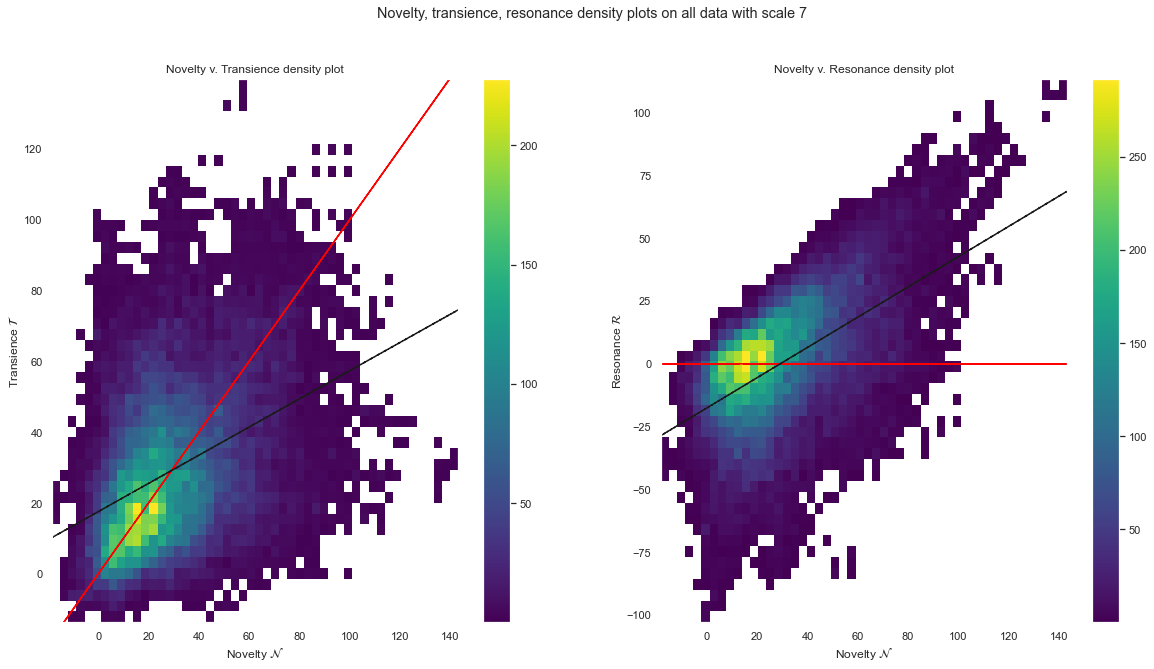

In [ ]:
tarr2 = plot_ntr_select(td2)

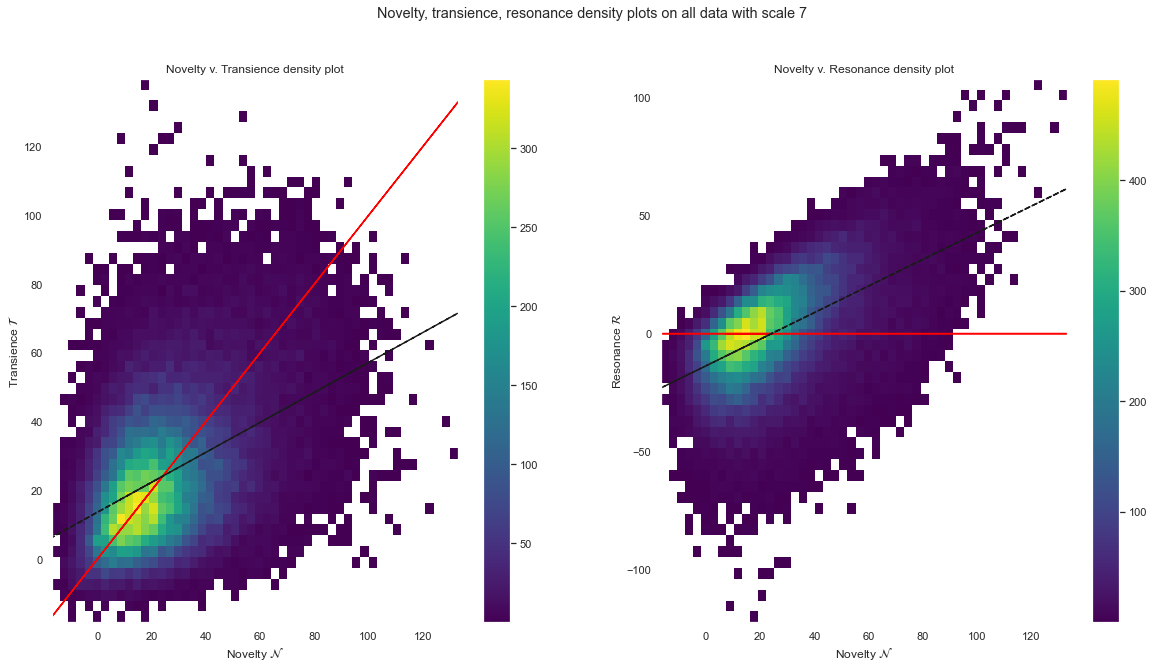

In [ ]:
df_select = df[df.chair_in_charge=='CHAIRMAN GREENSPAN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])
t = plot_ntr_select(td2)

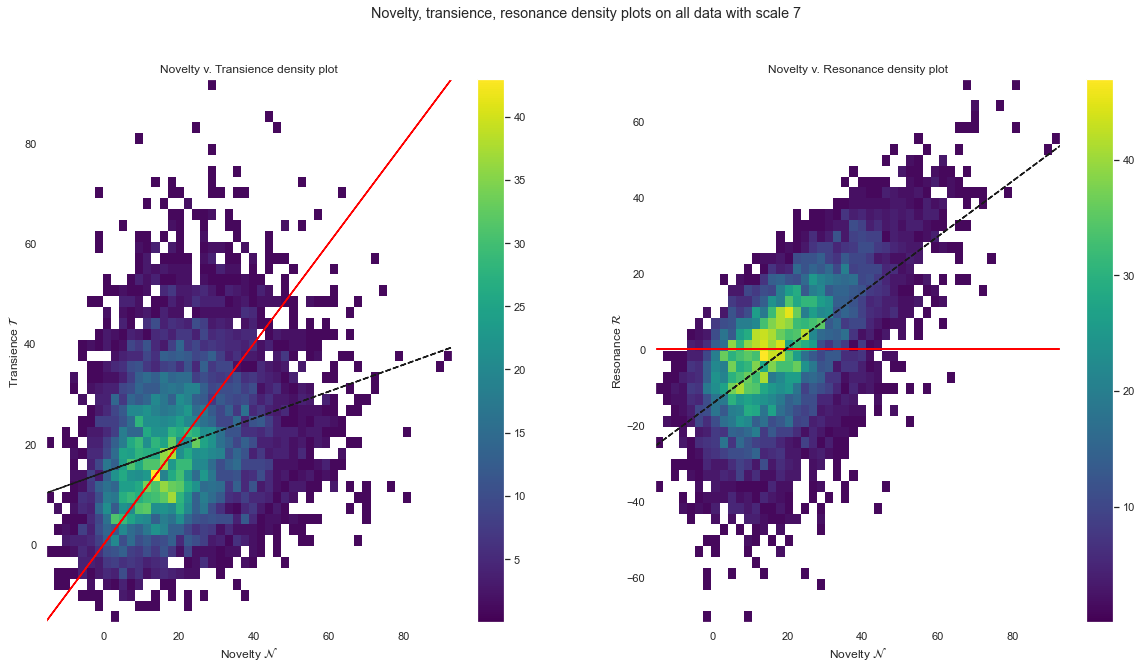

In [ ]:
df_select = df[df.chair_in_charge=='CHAIRMAN MILLER']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])
t = plot_ntr_select(td2)

In [98]:
n_mean, n_std, t_mean, t_std, r_mean, r_std = [],[],[],[],[],[]
for name in chair_list :
    df_select = df[df.chair_in_charge==name]
    #transform
    X = vect.transform(df_select.lemmatized)

    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    td2 = list(ldamodel[corpus])
    
    thetas_arr = [[1 for i in range(100)] for j in range(len(td2))]
    for i in range(len(td2)):
        for j in range(len(td2[i])):
            index_arr = td2[i][j][0]
            #print(index_arr)
            thetas_arr[i][index_arr] = td2[i][j][1]

    thetas_arr = np.array(thetas_arr)
    
    ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
    n_mean.append(np.mean(ntr[0]))
    n_std.append(np.std(ntr[0]))
    t_mean.append(np.mean(ntr[1]))
    t_std.append(np.std(ntr[1]))
    r_mean.append(np.mean(ntr[2]))
    r_std.append(np.std(ntr[2]))

NameError: ignored

In [ ]:
df_chair = pd.DataFrame({'name':chair_list})
df_chair['novelty_mean']=n_mean
df_chair['transience_mean']=t_mean
df_chair['resonance_mean']=r_mean
df_chair['novelty_std']=n_std
df_chair['transience_std']=t_std
df_chair['resonance_std']=r_std

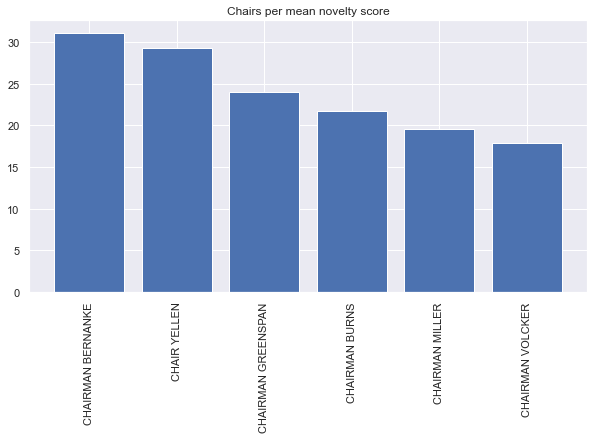

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_chair.sort_values(by='novelty_mean', ascending=False).name, df_chair.sort_values(by='novelty_mean', ascending=False)['novelty_mean'])
plt.xticks(rotation=90)  
plt.title("Chairs per mean novelty score")
plt.show()                                                                                                                                       
                                                                                                                                           


In [101]:
df.groupby(['interlocutor_name','chair_in_charge']).apply(lambda s: ' '.join(s['lemmatized']))

interlocutor_name  chair_in_charge   
AARONSON           CHAIRMAN BERNANKE      referring exhibit follow green nonfinancial c...
AHMED              CHAIRMAN BERNANKE      referring exhibit follow blue international o...
ALEXANDER          CHAIRMAN GREENSPAN     main change forecast international driven eve...
ALTMA              CHAIRMAN MILLER        vice chairman volcker yes president baughman ...
                   CHAIRMAN VOLCKER       chairman volcker yes president balles preside...
                                                               ...                        
ZEISEL             CHAIRMAN MILLER        rate growth labor force percent slightly oppo...
                   CHAIRMAN VOLCKER       thank chairman statementsee appendix  change ...
ZICKLER            CHAIRMAN BERNANKE      thank ill referring material briefing fomc pa...
                   CHAIRMAN VOLCKER       point business cycle seeing increase largely ...
ŞAHIN              CHAIRMAN BERNANKE      thank revi

In [97]:
dfNTR=pd.read_csv('/interlocutor_score_ntr.csv', low_memory=True)
dfNTR.head()

,Unnamed: 0,name,novelty_mean,transience_mean,resonance_mean,novelty_std,transience_std,resonance_std
0,0,BURNS,17.310189,17.375599,-0.065410,14.547308,14.706539,18.272809
1,1,HOLMES,22.555315,22.821946,-0.266631,15.492551,15.176697,22.090123
2,2,BLACK,20.488461,20.485645,0.002816,13.612216,13.543083,17.070561
3,3,PARDEE,24.907404,25.162809,-0.255405,14.209138,14.236890,18.633660
4,4,COLDWELL,17.356864,17.320285,0.036579,11.616739,11.833040,15.013440


In [106]:
statement_count = df.groupby(['interlocutor_name']).agg({'index':'count'})

In [154]:
df_interloc = dfNTR.join(statement_count, on='name')
df_interloc['weighted_nvlty']=df_interloc['novelty_mean']/df_interloc['index']
df_interloc['weighted_res']=df_interloc['resonance_mean']/df_interloc['index']
df_interloc['weighted_tr']=df_interloc['transience_mean']/df_interloc['index']

df_interloc['w_n_std']=df_interloc['novelty_std']/df_interloc['index']
df_interloc['w_r_std']=df_interloc['resonance_std']/df_interloc['index']
df_interloc['w_t_std']=df_interloc['transience_std']/df_interloc['index']

In [114]:
df_interloc

,Unnamed: 0,name,novelty_mean,transience_mean,resonance_mean,novelty_std,transience_std,resonance_std,index,weighted_nvlty
0,0,BURNS,17.310189,17.375599,-0.065410,14.547308,14.706539,18.272809,2799,0.006184
1,1,HOLMES,22.555315,22.821946,-0.266631,15.492551,15.176697,22.090123,341,0.066145
2,2,BLACK,20.488461,20.485645,0.002816,13.612216,13.543083,17.070561,2072,0.009888
3,3,PARDEE,24.907404,25.162809,-0.255405,14.209138,14.236890,18.633660,465,0.053564
4,4,COLDWELL,17.356864,17.320285,0.036579,11.616739,11.833040,15.013440,1013,0.017134
...,...,...,...,...,...,...,...,...,...,...
190,401,CLARK,43.104041,55.622176,-12.518135,39.450994,39.688239,9.939531,24,1.796002
191,405,ROSEN,18.494573,21.871362,-3.376789,19.612327,11.626643,19.074048,24,0.770607
192,407,KAPLAN,47.523943,49.840043,-2.316099,22.934309,25.718133,15.872291,156,0.304641
193,413,YI,62.610387,63.767375,-1.156988,18.802727,16.282293,14.926287,36,1.739177


Text(0.5, 1.0, 'Top 20 people with the most transient discourse weighted by number of statements')

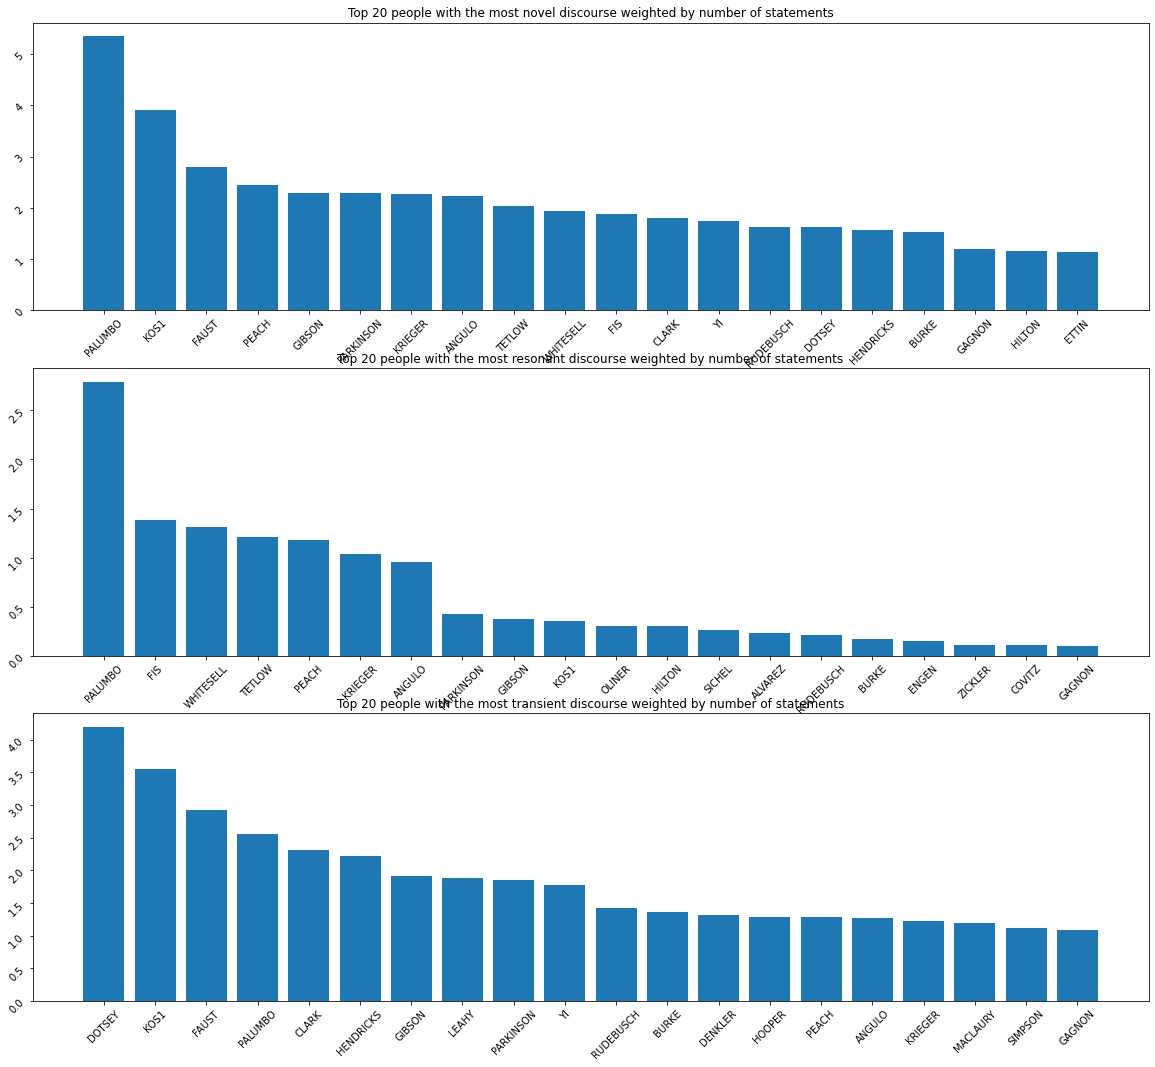

In [140]:
fig, ax = plt.subplots(3, 1, figsize=(20,18))
ax[0].bar(df_interloc.sort_values(by='weighted_nvlty', ascending=False)['name'][:20], df_interloc.sort_values(by='weighted_nvlty', ascending=False)['weighted_nvlty'][:20])
ax[0].tick_params(labelrotation=45) 
ax[0].set_title("Top 20 people with the most novel discourse weighted by number of statements")
                                                                                                                                     

ax[1].bar(df_interloc.sort_values(by='weighted_res', ascending=False)['name'][:20], df_interloc.sort_values(by='weighted_res', ascending=False)['weighted_res'][:20])
ax[1].tick_params(labelrotation=45)   
ax[1].set_title("Top 20 people with the most resonant discourse weighted by number of statements")
                                                                                             

ax[2].bar(df_interloc.sort_values(by='weighted_tr', ascending=False)['name'][:20], df_interloc.sort_values(by='weighted_tr', ascending=False)['weighted_tr'][:20])
ax[2].tick_params(labelrotation=45)  
ax[2].set_title("Top 20 people with the most transient discourse weighted by number of statements")

                                                                 

Text(0.5, 1.0, 'Top 20 people with the least transient discourse weighted by number of statements')

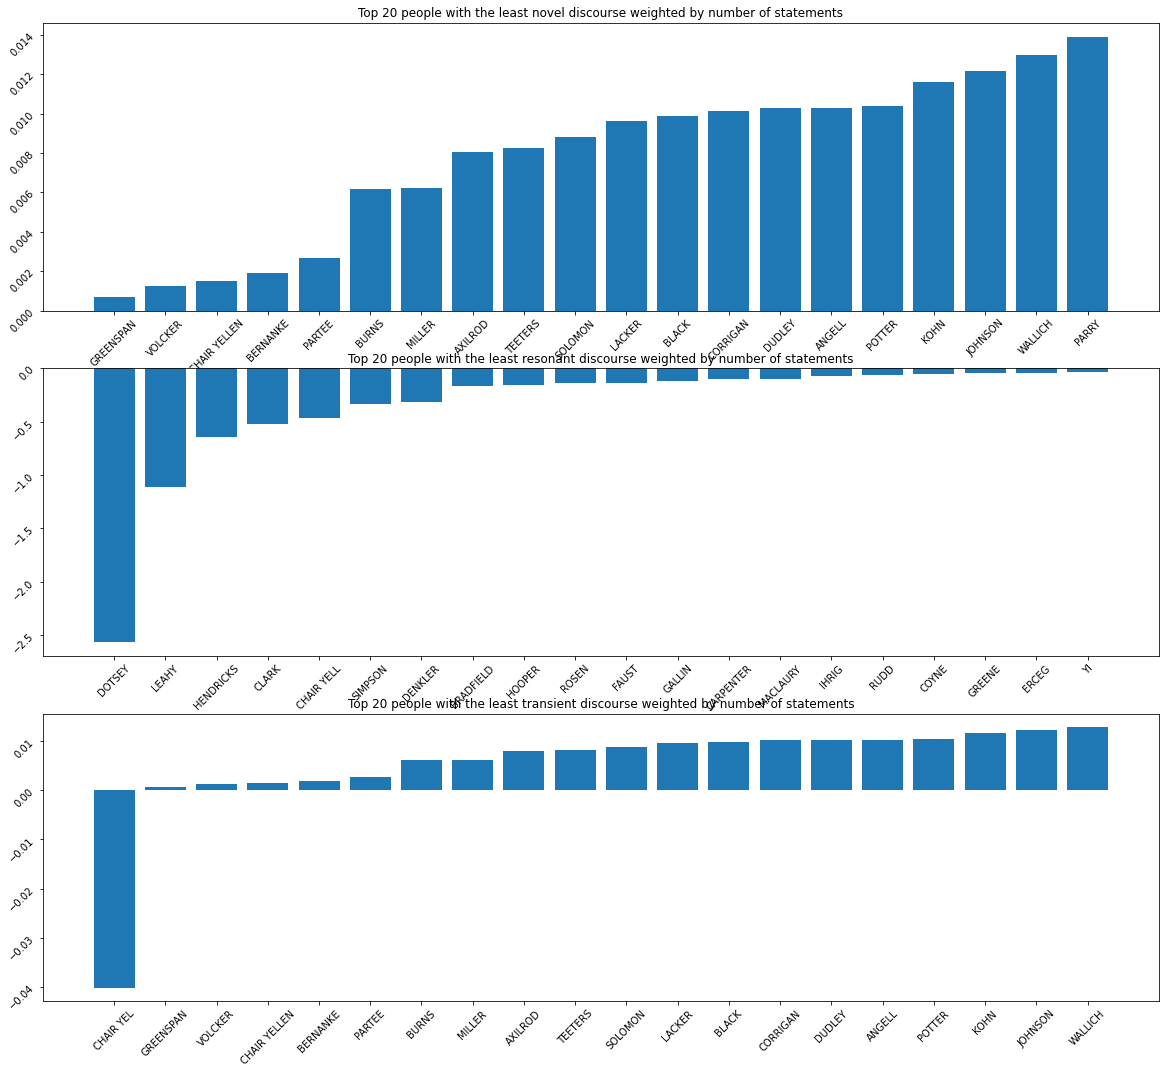

In [141]:
fig, ax = plt.subplots(3, 1, figsize=(20,18))
ax[0].bar(df_interloc.sort_values(by='weighted_nvlty', ascending=True)['name'][:20], df_interloc.sort_values(by='weighted_nvlty', ascending=True)['weighted_nvlty'][:20])
ax[0].tick_params(labelrotation=45) 
ax[0].set_title("Top 20 people with the least novel discourse weighted by number of statements")
                                                                                                                                     

ax[1].bar(df_interloc.sort_values(by='weighted_res', ascending=True)['name'][:20], df_interloc.sort_values(by='weighted_res', ascending=True)['weighted_res'][:20])
ax[1].tick_params(labelrotation=45)   
ax[1].set_title("Top 20 people with the least resonant discourse weighted by number of statements")
                                                                                             

ax[2].bar(df_interloc.sort_values(by='weighted_tr', ascending=True)['name'][:20], df_interloc.sort_values(by='weighted_tr', ascending=True)['weighted_tr'][:20])
ax[2].tick_params(labelrotation=45)  
ax[2].set_title("Top 20 people with the least transient discourse weighted by number of statements")

                                                                 

In [157]:
df_interloc.sort_values(by='weighted_tr', ascending=True)[['name', 'transience_mean','transience_std', 'w_t_std','weighted_tr']][:20]

,name,transience_mean,transience_std,w_t_std,weighted_tr
188,CHAIR YEL,-0.967765,1.042315,0.043430,-0.040324
72,GREENSPAN,11.109219,12.056208,0.000767,0.000707
19,VOLCKER,16.684677,13.141628,0.000975,0.001238
178,CHAIR YELLEN,14.457790,17.541657,0.001824,0.001503
117,BERNANKE,14.619425,13.557569,0.001764,0.001902
5,PARTEE,13.911724,11.219570,0.002151,0.002667
0,BURNS,17.375599,14.706539,0.005254,0.006208
34,MILLER,15.416349,13.899841,0.005600,0.006211
14,AXILROD,21.833266,13.449152,0.004968,0.008065
36,TEETERS,12.575666,10.232190,0.006675,0.008203


In [159]:
df_interloc.sort_values(by='weighted_res', ascending=False)[['name', 'resonance_mean','resonance_std','weighted_res','w_r_std']][:20]

,name,resonance_mean,resonance_std,weighted_res,w_r_std
159,PALUMBO,41.883222,0.000000,2.792215,0.000000
185,FIS,33.221680,44.826719,1.384237,1.867780
101,WHITESELL,23.554811,8.726594,1.308601,0.484811
120,TETLOW,31.503430,25.358577,1.211670,0.975330
129,PEACH,18.800195,13.752995,1.175012,0.859562
93,KRIEGER,19.770184,9.763703,1.040536,0.513879
145,ANGULO,21.006147,32.549269,0.954825,1.479512
102,PARKINSON,9.404263,9.957144,0.427467,0.452597
144,GIBSON,7.039687,4.324367,0.370510,0.227598
115,KOS1,7.426406,14.435088,0.353638,0.687385


Text(0.5, 1.0, 'Top 20 people with the least transient discourse weighted by number of statements')

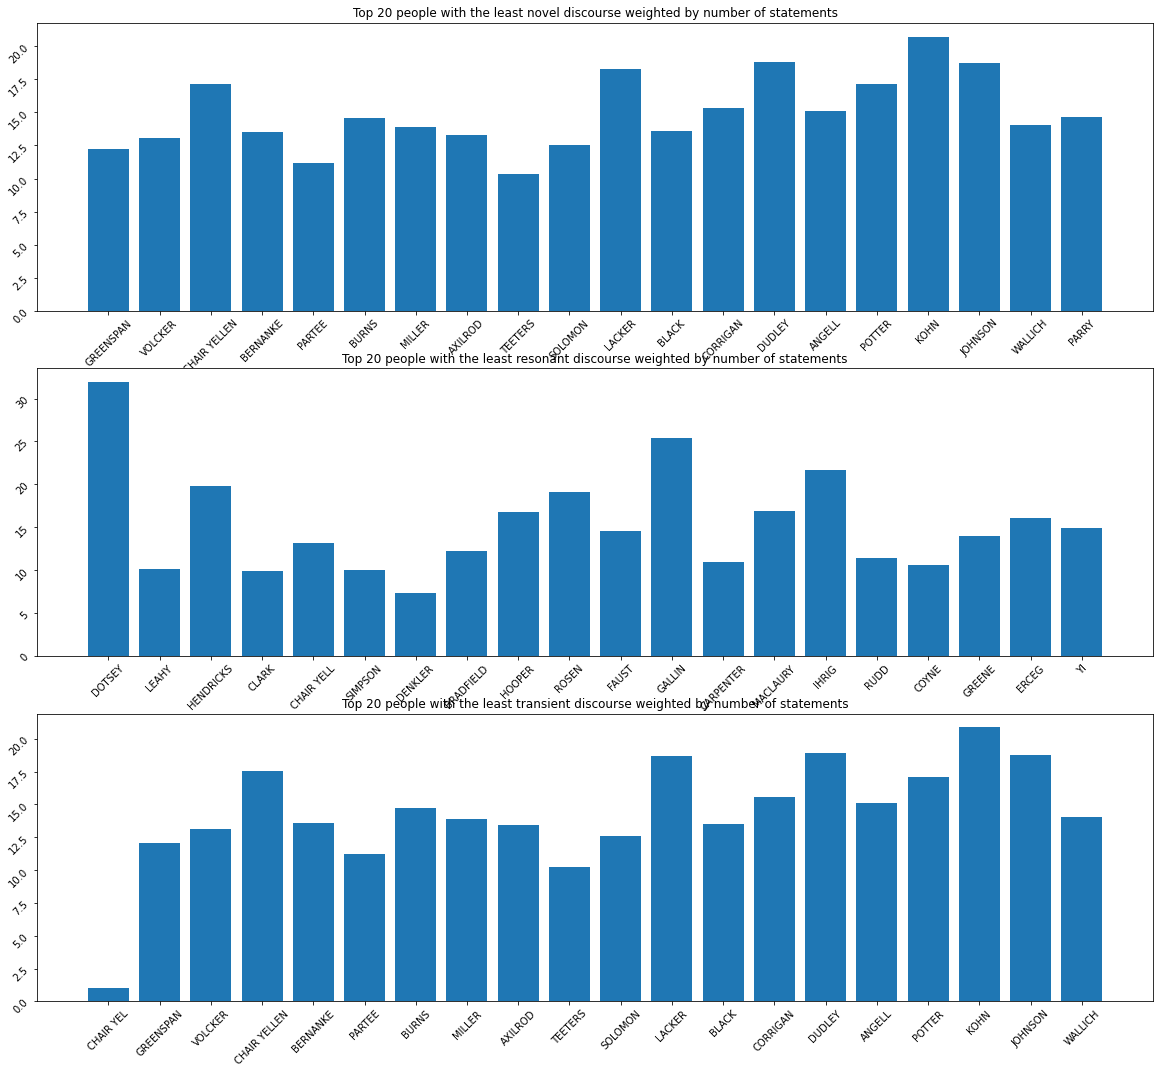

In [153]:
fig, ax = plt.subplots(3, 1, figsize=(20,18))
ax[0].bar(df_interloc.sort_values(by='weighted_nvlty', ascending=True)['name'][:20], df_interloc.sort_values(by='weighted_nvlty', ascending=True)['novelty_std'][:20])
ax[0].tick_params(labelrotation=45) 
ax[0].set_title("Top 20 people with the least novel discourse weighted by number of statements")
                                                                                                                                     

ax[1].bar(df_interloc.sort_values(by='weighted_res', ascending=True)['name'][:20], df_interloc.sort_values(by='weighted_res', ascending=True)['resonance_std'][:20])
ax[1].tick_params(labelrotation=45)   
ax[1].set_title("Top 20 people with the least resonant discourse weighted by number of statements")
                                                                                             

ax[2].bar(df_interloc.sort_values(by='weighted_tr', ascending=True)['name'][:20], df_interloc.sort_values(by='weighted_tr', ascending=True)['transience_std'][:20])
ax[2].tick_params(labelrotation=45)  
ax[2].set_title("Top 20 people with the least transient discourse weighted by number of statements")

                                                                 

### PER INTERLOCUTOR

In [ ]:
df_select = df[df.interlocutor_name=='CHAIR YELLEN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

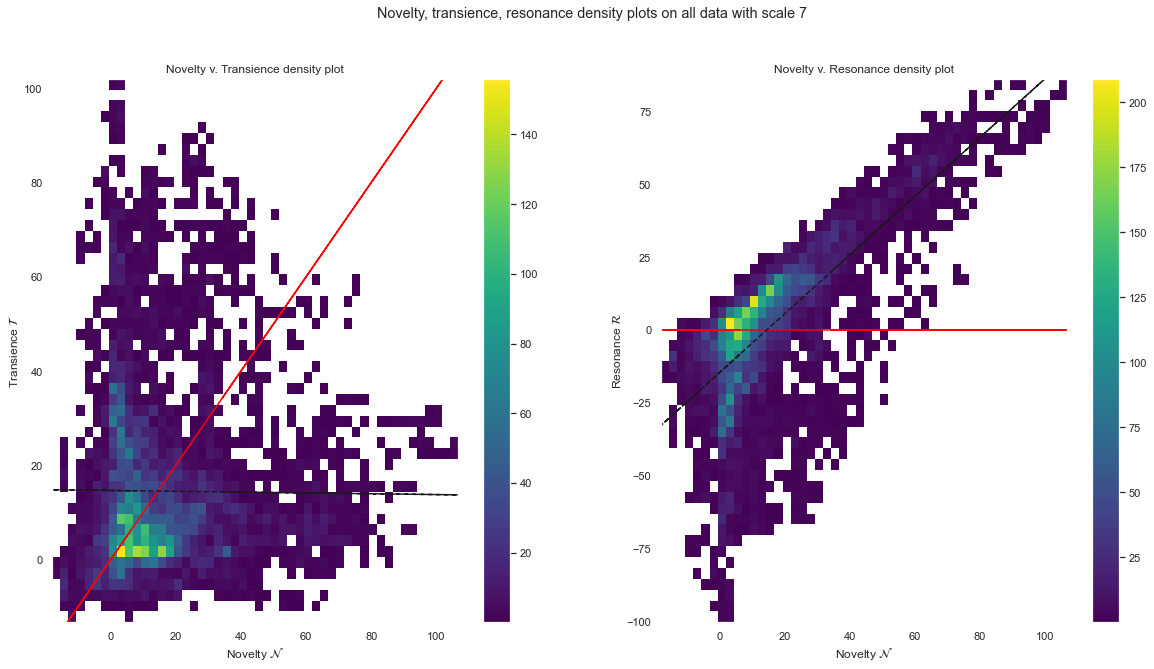

In [ ]:
t = plot_ntr_select(td2)

Traceback (most recent call last):
  File "/Users/h2jw/opt/anaconda3/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/Users/h2jw/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/h2jw/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 405, in _send_bytes
    self._send(buf)
  File "/Users/h2jw/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


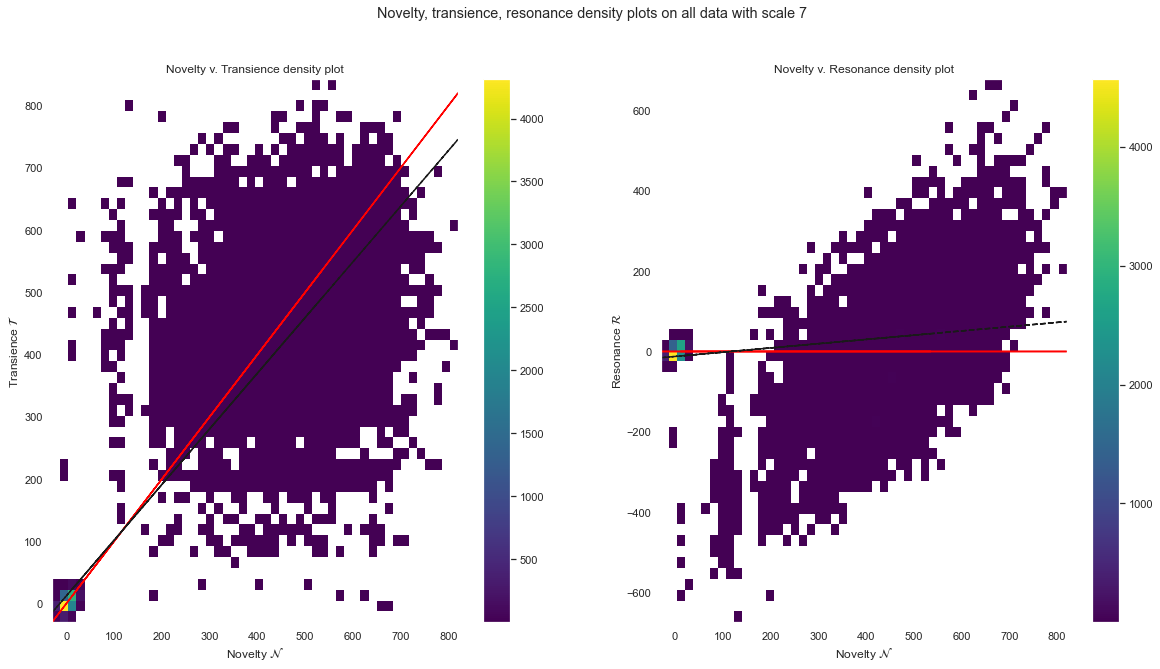

In [ ]:
df_select = df[df.interlocutor_name=='GREENSPAN']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

t = plot_ntr_select(td2)

In [ ]:
df_select = df[df.interlocutor_name=='BURNS']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])

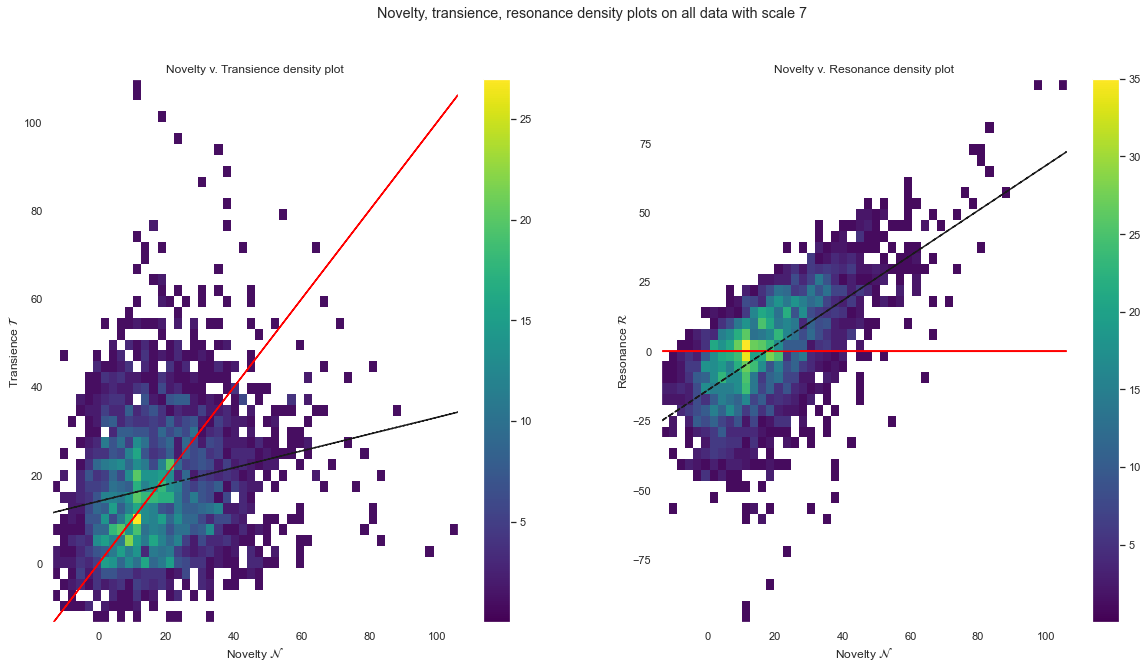

In [ ]:
t = plot_ntr_select(td2)

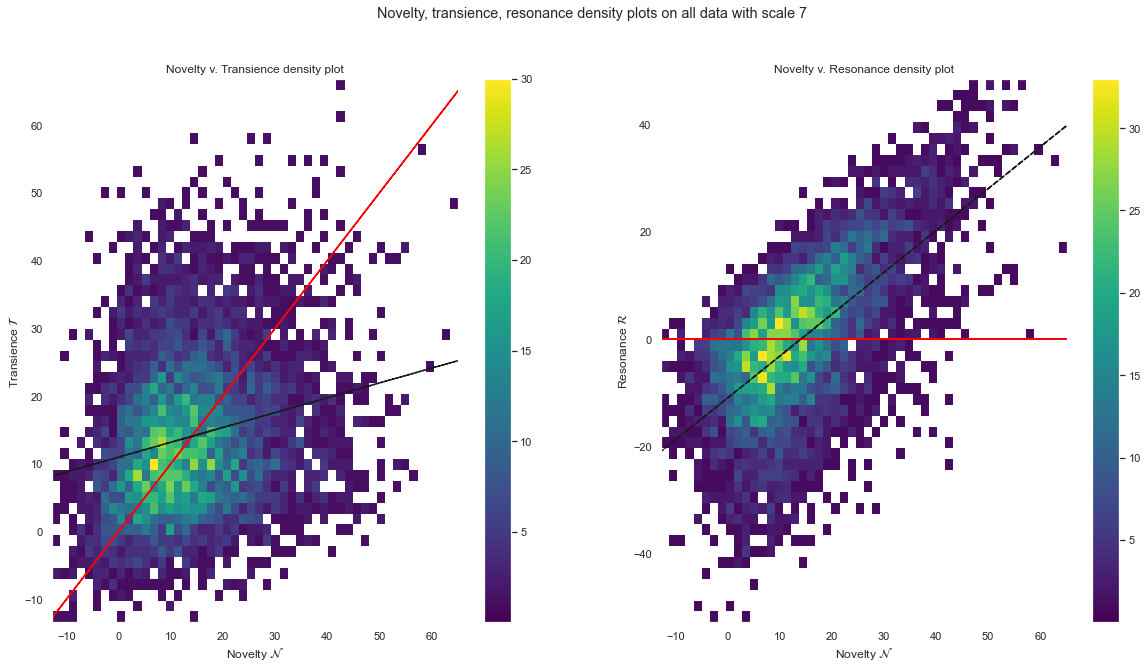

In [ ]:
#

#pd.unique(df.interlocutor_name)

df_select = df[df.interlocutor_name=='PARTEE']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])
t = plot_ntr_select(td2)

In [ ]:
df_interloc = pd.DataFrame({'name':interloc_list})

In [ ]:
n_mean, n_std, t_mean, t_std, r_mean, r_std = [],[],[],[],[],[]
for name in interloc_list :
    df_select = df[df.interlocutor_name==name]
    #transform
    X = vect.transform(df_select.lemmatized)

    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    td2 = list(ldamodel[corpus])
    
    thetas_arr = [[1 for i in range(100)] for j in range(len(td2))]
    for i in range(len(td2)):
        for j in range(len(td2[i])):
            index_arr = td2[i][j][0]
            #print(index_arr)
            thetas_arr[i][index_arr] = td2[i][j][1]

    thetas_arr = np.array(thetas_arr)
    
    ntr = novelty_transience_resonance(np.array(thetas_arr), 7)
    n_mean.append(np.mean(ntr[0]))
    n_std.append(np.std(ntr[0]))
    t_mean.append(np.mean(ntr[1]))
    t_std.append(np.std(ntr[1]))
    r_mean.append(np.mean(ntr[2]))
    r_std.append(np.std(ntr[2]))

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df_interloc['novelty_mean']=n_mean
df_interloc['transience_mean']=t_mean
df_interloc['resonance_mean']=r_mean

In [ ]:
df_interloc['novelty_std']=n_std
df_interloc['transience_std']=t_std
df_interloc['resonance_std']=r_std

In [ ]:
df_interloc = df_interloc.dropna()

In [ ]:
#df_interloc.to_csv('interlocutor_score_ntr.csv')
df_interloc = df_interloc.set_index('name')

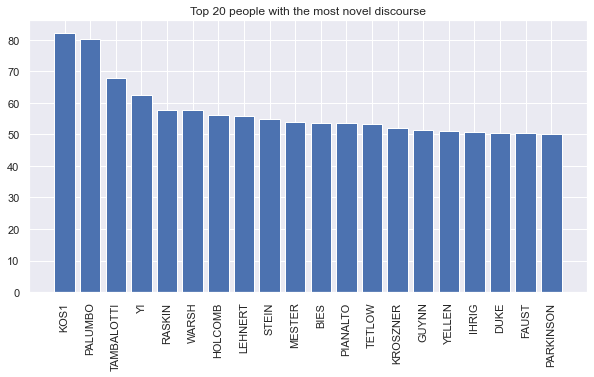

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_interloc.sort_values(by='novelty_mean', ascending=False).index[:20], df_interloc.sort_values(by='novelty_mean', ascending=False)['novelty_mean'][:20])
plt.xticks(rotation=90)  
plt.title("Top 20 people with the most novel discourse")
plt.show()                                                                                                                                       
                                                                                                                                           



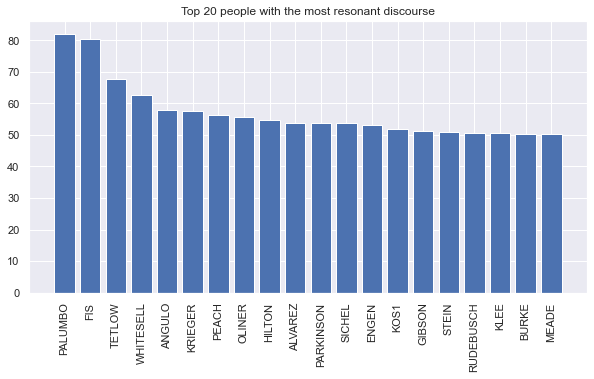

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_interloc.sort_values(by='resonance_mean', ascending=False).index[:20], df_interloc.sort_values(by='novelty_mean', ascending=False)['novelty_mean'][:20])
plt.xticks(rotation=90)  
plt.title("Top 20 people with the most resonant discourse")
plt.show()                                                                                                                                       
            

### Policy topics

Selecting policy topics using Meade's (2005) methods.

In [ ]:
data_meade = pd.read_excel('/Users/h2jw/Documents/GitHub/NLP-FOMC/LDA_qje/Additional Data/Meade2017RevisedData.xls', sheet_name='Data--new')

In [ ]:
data_meade.head()

,yr,mon,fdate,dtnum,dtname,board,voter,vote,voteobs,dev,...,postFF,chFF,drate,dbp,dbias,mvdiss_rate,vdiss_rate,vdiss_bias,mvdiss_bias,dissvote
0,1989,2,1989-02-07,1,Boston,0,Syron,NaN,NaN,NaN,...,9.0,0,1.0,25.0,NaN,1.0,1.0,0.0,0.0,NaN
1,1989,2,1989-02-07,2,New York,0,Corrigan,0.0,1.0,NaN,...,9.0,0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0
2,1989,2,1989-02-07,3,Philadelphia,0,Boehne,NaN,NaN,NaN,...,9.0,0,1.0,50.0,NaN,1.0,1.0,NaN,NaN,NaN
3,1989,2,1989-02-07,4,Cleveland,0,Hoskins,1.0,2.0,1.0,...,9.0,0,1.0,50.0,NaN,1.0,1.0,NaN,NaN,1.0
4,1989,2,1989-02-07,5,Richmond,0,Black,0.0,1.0,NaN,...,9.0,0,1.0,50.0,NaN,1.0,1.0,NaN,NaN,0.0


## Communication measures

In [ ]:
df['year']= df.Date.dt.year
df['yearmon']=df.Date.dt.month
df_hd = df[df.year <= 2014].groupby(['year', 'yearmon']).agg({'score_hawkish':np.mean})

<AxesSubplot:xlabel='year,yearmon'>

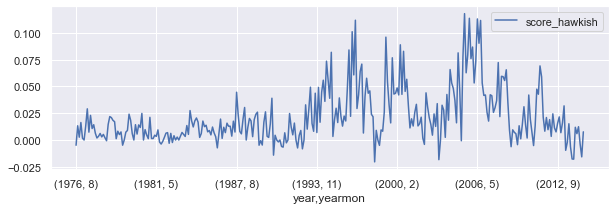

In [ ]:
df_hd.plot(figsize=(10,3))

In [ ]:
def create_Pr_score(statement):
    quant=0
    for word in statement.split():
        if word.isnumeric():
            quant+=1
    return quant

def herfindahl_concentration_index(statement):
    

In [ ]:
interloc_list

array(['BURNS', 'HOLMES', 'BLACK', 'PARDEE', 'COLDWELL', 'PARTEE',
       'EASTBURN', 'WALLICH', 'JACKSON', 'GARDNER', 'BAUGHMAN', 'GRAMLEY',
       'WINN', 'KIMBREL', 'AXILROD', 'MAYO', 'WILLIAMS', 'GUFFEY',
       'MORRIS', 'VOLCKER', 'MACLAURY', 'BROIDA', 'ZEISEL', 'BALLES',
       'STERNLIGHT', 'LILLY', 'ROOS', 'MACCLAURY', 'PAULUS', 'REYNOLDS',
       'VAN', 'KICHLINE', 'WILLES', 'FOSSUM', 'MEEK', 'ALTMANN', 'TRUMAN',
       'RANKIN', 'COYNE', 'SICILIANO', 'SMOOT', 'WILLIS', 'ETTIN',
       'GUENTHER', 'WALLACE', 'MAYOMR', 'MILLER', 'DENKLER', 'MORIARTY',
       'CZERWINSKI', 'TEETERS', 'OCONNELL', 'BAUGHWJV', 'MACDONALD',
       'ALTMA', 'HOMES', 'GAINOR', 'WALLJCH', 'MCINTOSH', 'GREENE',
       'RICE', 'FARNSWORTH', 'ROBINSON', 'TIMLEN', 'PRELL', 'SCHULTZ',
       'VOLCRER', 'KIMEREL', 'SCWLTZ', 'VOLCKFR', 'BECK', 'SIMPSON',
       'LINDSEY', 'KERAN', 'FORRESTAL', 'SOLOMON', 'PETERSEN', 'FORD',
       'KEIR', 'CORRIGAN', 'GRALEY', 'OLTMAN', 'BOEHNE', 'BOYKIN',
       'DOYLE', 'K

In [ ]:
df_select = df[df.interlocutor_name=='TAMBALOTTI']
#transform
X = vect.transform(df_select.lemmatized)
 
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
td2 = list(ldamodel[corpus])